<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/SingleVariable_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### using the LinearRegression class and without data spliting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate data for independent variable and dependent variable
X = np.array([24, 38, 41, 72, 58, 82, 124]).reshape(-1, 1)
y = np.array([ 2,  3,  4,  5,  6,  7,   8])


# Create regression model
model = LinearRegression()

# Training the model
model.fit(X, y)
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


# Predict values for real values
y_pred=model.predict(X)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculating the R-squared score
r2 = r2_score(y, y_pred)


# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")


# Predict values for new values
new_X = np.array([52, 96,32,41,79,62]).reshape(-1, 1)
predicted_y = model.predict(new_X)
print(f"X and y : \n{new_X} ==> {predicted_y}")

# Plot real data
plt.scatter(X, y, color='blue')

# # Estimated line drawing
plt.plot(X, y_pred, color='red')

# Plot new data
plt.scatter(new_X, predicted_y, color='green')

# Add labels to plot
plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)

# # Show plot
plt.show()


### without using the LinearRegression class and without spliting data - Normal Equation

Thetas : [1.27435983 0.05940656]
Mean Squared Error : 0.5629059972339804
R-squared : 0.8592735006915049


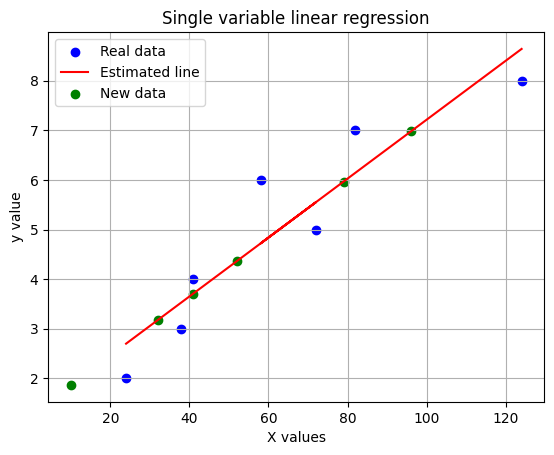

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_residual / ss_total)

# Generate data for independent variable and dependent variable
X = np.array([24, 38, 41, 72, 58, 82, 124]).reshape(-1, 1)
y = np.array([ 2,  3,  4,  5,  6,  7,   8])

# # Add column one
X = np.c_[np.ones((X.shape[0], 1)), X]                                          #X = np.hstack((np.ones((X.shape[0], 1)), X))

# # Find model parameters by normal equation method
theta = normal_equation(X, y)

# Show model parameters
print(f"Thetas : {theta}")


# Predict values for real values
y_pred =np.dot(X, theta)                                                        #y_pred = X @ theta

# # Calculating the Mean Squared Error (MSE) and r-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")

# Predict values for new values
new_X = np.array([52,10, 96,32,41,79]).reshape(-1, 1)
new_X = np.c_[np.ones((new_X.shape[0], 1)), new_X]
predicted_y =np.dot(new_X, theta)
# print(f"X and y : \n{new_X} ==> {predicted_y}")



# Plot real data
plt.scatter(X[:,1], y, color='blue')

# Estimated line drawing
plt.plot(X[:,1], y_pred, color='red')

# Plot new data
plt.scatter(new_X[:,1], predicted_y, color='green')

# Add labels to plot
plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)

# Show plot
plt.show()

### without using the LinearRegression class and without spliting data - Gradient Descent

Mean Squared Error : 0.8722163093632388
R-squared : 0.7819459226591903
X and y : 
[[ 1. 52.]
 [ 1. 96.]
 [ 1. 32.]
 [ 1. 41.]
 [ 1. 79.]] ==> [3.94481821 7.26075143 2.43757584 3.1158349  5.97959542]
Thetas : [0.02598804 0.07536212]


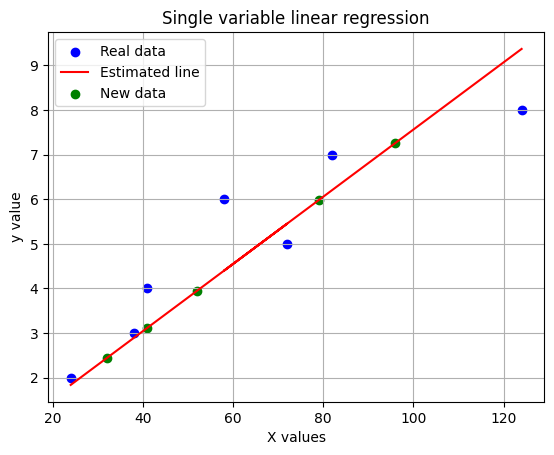

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(theta, X):
    return np.dot(X, theta)

def cost_function(theta, X, y):
    m = len(y)
    J = np.sum((hypothesis(theta, X) - y) ** 2) / (2 * m)
    return J

def gradient_descent(theta, X, y, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        gradient = np.dot(X.T, (hypothesis(theta, X) - y)) / m
        theta = theta - (learning_rate * gradient)
        cost_history[i] = cost_function(theta, X, y)
    return theta, cost_history

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_residual / ss_total)


# Generate data for independent variable and dependent variable
X = np.array([24, 38, 41, 72, 58, 82, 124]).reshape(-1, 1)
y = np.array([ 2,  3,  4,  5,  6,  7,   8])

# Add column one
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initializing the theta parameters
initia_theta = np.zeros(X.shape[1])

# Initialization hyperparameters
learning_rate = 0.0001
iterations = 1000

# Run gradient descent algorithm
theta, cost_history =gradient_descent(initia_theta, X, y, learning_rate, iterations)

# Predict values for real values
y_pred =hypothesis(theta, X)

# Calculating the Mean Squared Error (MSE) and r-squared score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")


# Predict values for new values
new_X = np.array([52, 96,32,41,79]).reshape(-1, 1)
new_X = np.c_[np.ones((new_X.shape[0], 1)), new_X]
predicted_y = hypothesis(theta, new_X)

print(f"X and y : \n{new_X} ==> {predicted_y}")


# Show model parameters
print(f"Thetas : {theta}")


# Plot real data
plt.scatter(X[:,1], y, color='blue')

# Estimated line drawing
plt.plot(X[:,1], y_pred, color='red')
# Plot new data
plt.scatter(new_X[:,1], predicted_y, color='green')
# Add labels to plot
plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)
# Show plot
plt.show()

## Tips dataset - Seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=sns.load_dataset('tips')
X = df[['total_bill']]
y = df[['tip']]

model intercept : [0.92026961]
model conf : [[0.10502452]]
Mean Squared Error : 1.036019442011377
R-squared : 0.45661658635167657
X and y : 
[[25. ]
 [15.5]
 [17. ]
 [26.1]] ==> [[3.54588255]
 [2.54814963]
 [2.70568641]
 [3.66140952]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


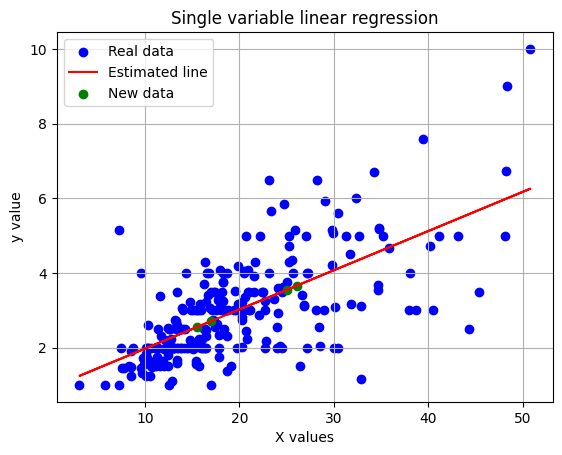

In [ ]:
# Create regression model
model = LinearRegression()

# Training the model
model.fit(X, y)
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


# Predict values for real values
y_pred=model.predict(X)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculating the R-squared score
r2 = r2_score(y, y_pred)

# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")


# Predict values for new values
new_X = np.array([25,15.5,17,26.1]).reshape(-1, 1)
predicted_y = model.predict(new_X)
print(f"X and y : \n{new_X} ==> {predicted_y}")

# Plot real data
plt.scatter(X, y, color='blue')

# Estimated line drawing
plt.plot(X, y_pred, color='red')

# Plot new data
plt.scatter(new_X, predicted_y, color='green')

# Add labels to plot
plt.xlabel('X values')
plt.ylabel('y value')
plt.title('Single variable linear regression')
plt.legend(['Real data','Estimated line',  'New data'])
plt.grid(True)

# Show plot
plt.show()
